# Ley de radiación de Plank
La densidad de energia dentro de un cuerpo negro isotermico se calcula con la ley de radiación de Plank dada por la siguiente ecuación
$$\varphi(\gamma)= \frac{8\pi Pc}{\gamma⁵(e^{Pc/\gamma Tk}-1)} \label{eq1}\tag{1} $$

Suponiendo queremos calcular la longitud de onda $\gamma_1$ para el valor maximo de la densidad de energia $\varphi(\gamma_1)$, entonces calculo $\varphi´(\gamma)=0$.


Para transformar la ecuación $(1)$ en una ecuación no lineal, escribiendola como una función $\psi(u)$ usando $u=\frac{Pc}{\gamma Tk}$ resultando en
la siguiente expresión $\psi_4(u)=-1+\frac{u}{5}+e^{-u}\label{eq2}\tag{2}$. 

Derivando la ecuación $(2)$ e igualando a cero, puedo obtener los puntos criticos...


In [1]:
#para no escribir sympy cada que ocupe algo de sympy 
from sympy import *

import numpy as np
import matplotlib.pyplot as plt

#defino u como variable simbólica
u = symbols('u')

# Define tu función usando sympy
psi = -1 + u/5 + exp(-u)
print('función psi(u): ')
display(psi)

# Calcula su primera derivada
df = diff(psi, u)

print('primera derivada de psi: ')
display(df)

# Igualando a cero, calcula para qué valor de 
pc = solve(Eq(df, 0))
print('Punto critico: ')
display(pc)


función psi(u): 


u/5 - 1 + exp(-u)

primera derivada de psi: 


1/5 - exp(-u)

Punto critico: 


[log(5)]

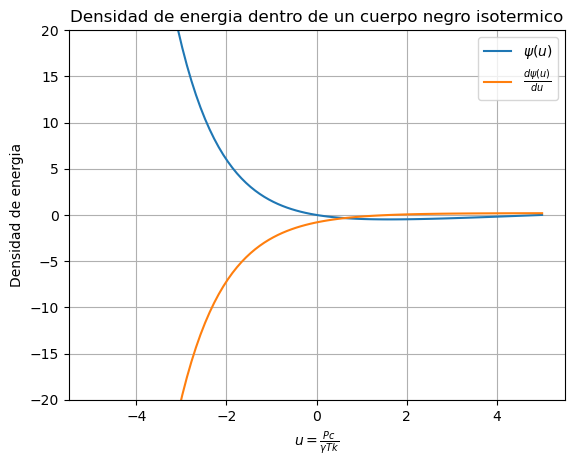

In [2]:
# Grafica
u_values = np.linspace(-5, 5, 100)  # Valores de u para graficar
psi_values = np.array([psi.subs(u, val) for val in u_values])  # Evaluar psi en los valores de u
df_values = np.array([df.subs(u, val) for val in u_values])  # Evaluar la derivada de psi en los valores de u

plt.figure()
plt.plot(u_values, psi_values, label=r'$\psi(u)$')
plt.plot(u_values, df_values, label=r'$\frac{d\psi(u)}{du}$')
plt.xlabel(r'$u= \frac{Pc}{\gamma Tk}$')
plt.ylabel('Densidad de energia')
plt.ylim(-20, 20)
plt.title('Densidad de energia dentro de un cuerpo negro isotermico')
plt.legend()
plt.grid(True)
plt.show()

Observando la gráfica para $\psi(u)$ se nota una intersección con el eje x positivo masomenos para u=4 entonces puedo empezar a aproximar con $u_0=4.0$

Aplicamos el metodo de Newton en busca de un punto fijo donde la función converja, esa sera su raiz.

In [3]:
#meto sympy para usar simbolos en mis mates
import sympy as sp

#defino metodo de newton,recibe func y asigna a f
def newton(func, u0, tol=1e-6, max_iter=50):
    #hacemos letra u un simbolo matematico
    u = sp.symbols('u')
    #se hace el lambdify para poderle evaluar valores
    f = sp.lambdify(u, func)
    df = sp.lambdify(u, sp.diff(func, u))
    
    #contador de iteraciones
    iter = 0
    
    #mientras la diferencia entre u's sea mayor que la tolerancia 
    #o mientras no llegue a el maximo de iteraciones que limite
    while True:
        u1 = u0 - f(u0) / df(u0)
        iter += 1
        print(f"Iteración {iter}: u = {u1}")
        
        if abs(u1 - u0) < tol or iter >= max_iter:
            break
        #reasigno valor obtenido de u y repetimos
        u0 = u1
    
    #caso default, no siempre funciona Newton, no siempre converge a un punto fijo
    if iter >= max_iter:
        print("No convergió después del máximo número de iteraciones ")
    
    #regresa la ultima raiz y donde se quedo el contador iter
    return u1, iter

#defino mi función a evaluar en metodo newton
u = sp.symbols('u')
funcion = sp.exp(-u) + u/5 - 1

#Valor inicial al que vamos a aproximar
u0 = 4.0

#llama a newton recibiendo la función y el valor inicial de u
#la funcion newton le regresa la raiz u1 y numero de iteraciones iter
raiz, iteraciones = newton(funcion, u0)

print(f"\nLa raíz encontrada es: {raiz}")
print(f"Número de iteraciones realizadas: {iteraciones}")


Iteración 1: u = 5.0
Iteración 2: u = 4.965135695836505
Iteración 3: u = 4.965114231752603
Iteración 4: u = 4.965114231744276

La raíz encontrada es: 4.965114231744276
Número de iteraciones realizadas: 4
